# <center>2018 Elections - Progresive Victories in the Democratic primaries</center>
### <center>Udacity Data Analysis Nano-Degree / by Aviad Giat</center>
# <center><span style="color:#aa5b02">Multi-Variate Exploration</span></center>

### Table of Contents
[Progressive Won and State](#Progressive-Won-and-State) <br> [Endorsements Won and Progressive](#Endorsements-Won-and-Progressive) <br> [Endorsements Primary Percent and Progressive](#Endorsements-Primary-Percent-and-Progressive) <br> [Endorsements Won Progressive and Race](#Endorsements-Won-Progressive-and-Race) <br> [Progressives success rate](#Progressives-success-rate)

### Import libraries

In [171]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display_html

In [172]:
%%html
<style>.output_wrapper, .output {height:auto !important; max-height:10000px;
                                }.output_scroll {box-shadow:none !important; webkit-box-shadow:none !important;}</style>

### Upload the data from Exploration1 file

In [173]:
dem = pd.read_csv('dem.csv')
dem.head(2)

,Candidate,State,Office Type,Date,Partisan Lean,Primary %,Won,Race,Veteran?,LGBTQ?,Elected Official?,Self-Funder?,Endorsements,value,Progressive
0,A.J. Balukoff,ID,Governor,5/15/18,-34.3,40.1,No,White,No,No,No,Yes,No,No,No
1,Aaron Godfrey,OH,Representative,5/8/18,-17.0,7.9,No,NaN,No,No,No,No,Our Revolution Endorsed?,Yes,Yes


Back to [top](#Multi-Variate-Exploration)

# <font color='84A3C1'>Progressive Won and State</font>
#### How many Progressive candidates won in each state?

In [174]:
# Progressive winnings in states
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val > 0 else 'black'
    return 'color: %s' % color

In [175]:
us_state_abbrev = {
    'Alabama': 'AL',    'Alaska': 'AK',    'Arizona': 'AZ',    'Arkansas': 'AR',    'California': 'CA',    'Colorado': 'CO',    'Connecticut': 'CT',    'Delaware': 'DE',    'Florida': 'FL',    'Georgia': 'GA',    'Hawaii': 'HI',    'Idaho': 'ID',    'Illinois': 'IL',    'Indiana': 'IN',    'Iowa': 'IA',    'Kansas': 'KS',    'Kentucky': 'KY',    'Louisiana': 'LA',    'Maine': 'ME',    'Maryland': 'MD',    'Massachusetts': 'MA',    'Michigan': 'MI',    'Minnesota': 'MN',    'Mississippi': 'MS',
    'Missouri': 'MO',    'Montana': 'MT',    'Nebraska': 'NE',    'Nevada': 'NV',    'New Hampshire': 'NH',    'New Jersey': 'NJ',    'New Mexico': 'NM',    'New York': 'NY',    'North Carolina': 'NC',    'North Dakota': 'ND',    'Ohio': 'OH',    'Oklahoma': 'OK',    'Oregon': 'OR',    'Pennsylvania': 'PA',    'Rhode Island': 'RI',    'South Carolina': 'SC',    'South Dakota': 'SD',    'Tennessee': 'TN',    'Texas': 'TX',    'Utah': 'UT',    'Vermont': 'VT',    'Virginia': 'VA',    'Washington': 'WA',    'West Virginia': 'WV',    'Wisconsin': 'WI',    'Wyoming': 'WY',}

In [176]:
# Dataframe 0 - State number of Officials
states_reps = pd.read_csv('states_reps.csv')
states_reps['State'].replace(to_replace=dict(us_state_abbrev), inplace=True)
states_reps = states_reps.sort_values('State', ascending=True)

# Adding 2 senators and 1 governor to each state's Officials column
states_reps['Officials'] = states_reps['Officials']  + 3
states_reps.reset_index(drop=True, inplace=True)


# Dataframe 1 - Unique candidates in states
state_can_uniq = dem.drop_duplicates(['Candidate'], keep='first')
state_can_uniq = state_can_uniq.groupby('State')['Candidate'].count()
state_can_uniq = pd.merge(state_can_uniq, states_reps, how='outer', on=['State'])
state_can_uniq = state_can_uniq.sort_values('State', ascending=True)
del state_can_uniq['Officials']
state_can_uniq.fillna(0, inplace=True)
state_can_uniq.reset_index(drop=True, inplace=True)
state_can_uniq.rename(columns={'Candidate': 'Candidates'}, inplace=True)


# Dataframe 2 - All winnings
state_all_win = dem.loc[(dem['Won'] == 'Yes')]
state_all_win = state_all_win.drop_duplicates(['Candidate'], keep='first')
state_all_win = state_all_win.groupby('State')['Candidate'].count()
state_all_win = pd.merge(state_all_win, states_reps, how='outer', on=['State'])
state_all_win = state_all_win.sort_values('State', ascending=True)
del state_all_win['Officials']
state_all_win.fillna(0, inplace=True)
state_all_win.reset_index(drop=True, inplace=True)
state_all_win.rename(columns={'Candidate': 'Candidates'}, inplace=True)


# Dataframe 3 - Progressives by state
state_pro = dem.loc[dem['Progressive'] == 'Yes']
state_pro = state_pro.drop_duplicates(['Candidate'], keep='first')
state_pro = state_pro.groupby('State')['Candidate'].count().reset_index()
state_pro = pd.merge(state_pro, states_reps, how='outer', on=['State'])
state_pro = state_pro.sort_values('State', ascending=True)
del state_pro['Officials']
state_pro.fillna(0, inplace=True)
state_pro.reset_index(drop=True, inplace=True)
state_pro.rename(columns={'Candidate': 'Progressives'}, inplace=True)


# Dataframe 4 - Progressives by state who won
state_pro_win = dem.loc[(dem['Won'] == 'Yes') & (dem['Progressive'] == 'Yes')]
state_pro_win = state_pro_win.fillna(0)
state_pro_win = state_pro_win.groupby('State')['Progressive'].count().reset_index()
state_pro_win = pd.merge(state_pro_win, states_reps, how='outer', on=['State'])
state_pro_win = state_pro_win.sort_values('State', ascending=True)
state_pro_win.rename(columns={'Progressive': 'Progressives'}, inplace=True)
del state_pro_win['Officials']
state_pro_win.fillna(0, inplace=True)
state_pro_win.reset_index(drop=True, inplace=True)


# Give stying to different dataframes
df1_styler = (state_can_uniq
              .style.set_table_attributes("style='display:inline'").set_caption('All candidates')
              .set_properties(subset=['State', 'Candidates'], **{'width': '90px', 'background-color': '#84A3C1','text-align': 'center'})
              .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'yellow')],
                                 'text-align': 'center'}]))

df2_styler = (state_all_win
              .style.set_table_attributes("style='display:inline'").set_caption('All wins')
              .set_properties(subset=['State', 'Candidates'], **{'width': '90px', 'background-color': '#96bacc','text-align': 'center'})
              .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'yellow')],
                                 'text-align': 'center'}]))

df3_styler = (state_pro
              .style.set_table_attributes("style='display:inline'").set_caption('Progressive candidates')
              .set_properties(subset=['State', 'Progressives'], **{'width': '90px', 'background-color': '#c0d9e5','text-align': 'center'})
             .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'yellow')],
                                 'text-align': 'center'}]))

df4_styler = (state_pro_win
              .style.set_table_attributes("style='display:inline'")
              .set_caption('Progressive wins')
              .applymap(color_negative_red, subset=['Progressives'])
              .apply(highlight_max, subset=['Progressives'])
              .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'yellow')]}])
              .set_properties(subset=['State', 'Progressives'], **{'width': '90px', 'background-color': '#daeaf2','text-align': 'center'}))

# Display the tables
display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_(), raw=True) #, 

,State,Candidates
0,AK,0
1,AL,16
2,AR,9
3,AZ,4
4,CA,70
5,CO,14
6,CT,2
7,DE,1
8,FL,10
9,GA,26


In the tables above we can see on the far left the number of available seats for each state (for the elections themselves, rather than the primaries); second table from the left we have the total number of uniue Democratic candidates; the third table brings all the Progressive candidates; and the last table shows us the number of Progressive winnings in each state.<br>
Here is a summary of the states with Progressive wins, in a table, plot and a map:

### Winning Progressives on the map by state

In [177]:
# Map of All states with their candidates

from IPython.display import IFrame

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
# Data object
data = [go.Choropleth(        
        colorscale = scl,
        autocolorscale = False,
        locations = state_pro_win['State'],
        z = state_pro_win['Progressives'].astype(float),
        locationmode = 'USA-states',
        text = state_pro_win['State'],
        marker = dict(
            line = dict(
                color = '#000000',
                width = 1)),
        colorbar = dict(
            title = "States and Progressive wins")
        )]
layout = go.Layout(title = 'Map with Progressive candidates who won by state', yaxis = dict(title = 'Count'), 
                   xaxis = dict(title = 'State'),
                  geo = dict(scope = 'usa', projection = dict(type = 'albers usa'), showlakes = True, lakecolor = 'rgb(66, 165, 245)'))
fig = dict(data=data, layout=layout)
py.iplot(fig)

C:\Users\Aviad\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



Texas was definitely the biggest winning state for Progressive in the 2018 Democratic primaries. Progressives won the primaries in 17 states. Texas lead with 11 candidates, followed by California and New York with 4 winnings and Michigan with 3 winnings.<br>
Were those winnings meaningful, compare to the rest of the candidates population? What about compare to the number of Progressive candidates?

### Progressives success rate

In [178]:
# Merge th above 4 dataframes to find the percent of Progressives from all the candidates and from the winners in the primaries.
per_success = state_can_uniq.merge(state_pro, on='State').merge(state_all_win, on='State').merge(state_pro_win, on='State')
del per_success['State']
import numpy as np
def sumColumn(matrix):
    return np.sum(matrix, axis=0)  # axis=1 says "get the sum along the columns"
per_success = per_success.apply(sumColumn)

# Change the Pandas Series to a new dataframe
per_success = per_success.to_frame().reset_index().T

# Remove extra index row
per_success = per_success.iloc[1:]

# Set columns names
per_success.rename(columns={0:'All Candidates',1:'Progressive Candidates',2: 'All Wins', 3:'Progressive Wins'}, inplace=True) # should match the list order in S1
per_success.reset_index(drop=True,inplace=True) # reset the funky index
per_success['% from Population'] = per_success['Progressive Candidates']/per_success['All Candidates']*100
per_success['% success from Population'] = per_success['Progressive Wins']/per_success['All Candidates']*100
per_success['% success from Progressives'] = per_success['Progressive Wins']/per_success['Progressive Candidates']*100

print("Success rate for Progressives")
per_success

Success rate for Progressives


,All Candidates,Progressive Candidates,All Wins,Progressive Wins,% from Population,% success from Population,% success from Progressives
0,839,105,264,46,12.5149,5.48272,43.8095


We can see that Progressive candidates comprised 12.5% of the total candidates population. This is 105 out of 839.<br>
Progressives won in 46 different primaries from 264 combats that ended with winnings, which is 5.5% success rate.<br>
From the Progressives population of 105, 44% succeeded with their primaries.

Back to [top](#Multi-Variate-Exploration)

# <font color='#85ad0c'>Endorsements Primary Percent and Progressive</font>
How did the Progessive pacs do, as one, compare to their main opponent in the Democratic Party, the Party Establishment, repesented here as "Party Support"?

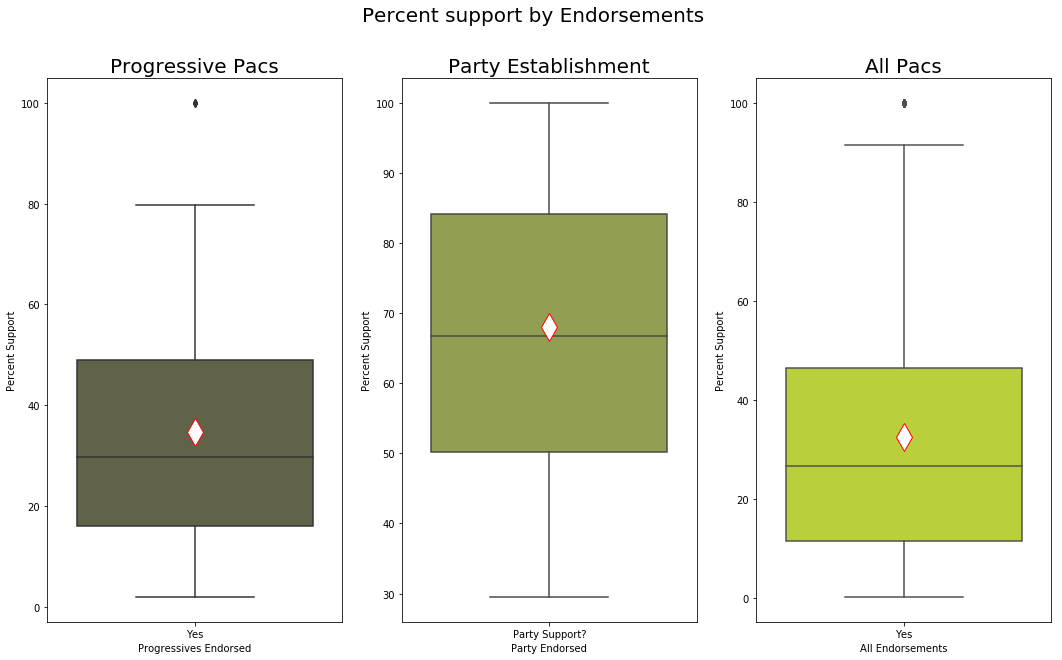

In [168]:
# Progressive Endorsements Support
progressive_support = dem[(dem['Endorsements'] == 'Justice Dems Endorsed?') | (
    dem1['Endorsements'] == 'PCCC Endorsed?') | (dem1['Endorsements'] == 'Our Revolution Endorsed?')]

# Drop NAs from the Primary Percent column
progressive_support = progressive_support.dropna(subset=['Primary %'])

# Put the Progressive pacs together
progressive_support.loc[:, 'Endorsements'] = 'Progressive Support?'

# Drop duplicates from the Candidate column
progressive_support = progressive_support.drop_duplicates(['Candidate'], keep = 'last')



# Party Endorsements Support
party_support = dem1[(dem1['Endorsements'] == 'Party Support?')]

# Drop duplicates from the Candidate column
progressive_support = progressive_support.drop_duplicates(['Candidate'], keep = 'last')

# Drop NAs from the Primary Percent column
party_support = party_support.dropna(subset=['Primary %'])



# All Endorsements Support
all_support = dem1.dropna(subset=['Primary %'])
all_support = all_support[(all_support['Endorsements'] != 'Party Support?') &
                          (all_support['Endorsements'] != 'Party Support?') &
                          (all_support['Endorsements'] != 'Justice Dems Endorsed?') &
                          (all_support['Endorsements'] != 'PCCC Endorsed?') &
                          (all_support['Endorsements'] != 'Party Support?') &
                          (all_support['Endorsements'] != 'Our Revolution Endorsed?')]

# Add a demi column to plot the entire column with 'Yes'
all_support.loc[:,'Endorsed'] = 'Yes' 

# Drop duplicates from the Candidate column
progressive_support = progressive_support.drop_duplicates(['Candidate'], keep = 'last')

# Drop NAs from the Primary Percent column
party_support = party_support.dropna(subset=['Primary %'])



# Plot
fig = plt.figure(figsize=(18,10))
fig.suptitle('Percent support by Endorsements', fontsize=20)

# progressive_support
plt.subplot(131)
sb.boxplot(x='Progressive', y = 'Primary %', data = progressive_support, showmeans=True, color="#636843",
          meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"red", 
                     "markersize":"20"}).set(xlabel='Progressives Endorsed', ylabel='Percent Support')
plt.title('Progressive Pacs', fontsize=20)

# party_support
plt.subplot(132)
sb.boxplot(x='Endorsements', y = 'Primary %', data = party_support, showmeans=True, color="#9baa46",
          meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"red", 
                     "markersize":"20"}).set(
    xlabel='Party Endorsed', 
    ylabel='Percent Support'
)
plt.title('Party Establishment', fontsize=20)

# all_support
plt.subplot(133)
sb.boxplot(x='Endorsed', y = 'Primary %', data = all_support, showmeans=True, color="#cae822",
          meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"red", 
                     "markersize":"20"}).set(
    xlabel='All Endorsements', 
    ylabel='Percent Support'
)
plt.title('All Pacs', fontsize=20)

plt.show()



In [169]:
# Create 3 tables with the above data in numbers
# Group by Endorsements and find the statistics for the Primary % column
pro_per = round(progressive_support.groupby('Endorsements')['Primary %'].describe(), 2).reset_index()
par_per = round(party_support.groupby('Endorsements')['Primary %'].describe(), 2).reset_index()
all_per = round(all_support.groupby('Endorsed')['Primary %'].describe(), 2).reset_index()
# all_per = all_per.drop_duplicates(['Candidate'], keep='first')

df1_styler = (pro_per
              .style.set_table_attributes("style='display:inline'").set_caption('Progressive Pacs')
              .set_properties(subset=['Endorsements', 'count', 'mean', 'min', 'std', '25%', '50%', '75%', 'max'],
                              **{'width': '90px', 'color': '#ffffff', 'background-color': '#636843','text-align': 'center'})
              .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'yellow')],
                                 'text-align': 'center'}]))
df2_styler = (par_per
              .style.set_table_attributes("style='display:inline'").set_caption('Party Establishment')
              .set_properties(subset=['Endorsements', 'count', 'mean', 'min', 'std', '25%', '50%', '75%', 'max'],
                              **{'width': '90px', 'color': '#ffffff', 'background-color': '#9baa46','text-align': 'center'})
              .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'yellow')],
                                 'text-align': 'center'}]))
df3_styler = (all_per
              .style.set_table_attributes("style='display:inline'").set_caption('All Pacs')
              .set_properties(subset=['Endorsed', 'count', 'mean', 'min', 'std', '25%', '50%', '75%', 'max'],
                              **{'width': '90px', 'background-color': '#cae822','text-align': 'center'})
              .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'yellow')],
                                 'text-align': 'center'}]))

display(df1_styler, df2_styler, df3_styler)

,Endorsements,count,mean,std,min,25%,50%,75%,max
0,Progressive Support?,103,34.76,24.89,1.9,15.95,29.7,49,100


,Endorsements,count,mean,std,min,25%,50%,75%,max
0,Party Support?,22,68,23.03,29.5,50.15,66.8,84.15,100


,Endorsed,count,mean,std,min,25%,50%,75%,max
0,Yes,1083,32.48,26.43,0.1,11.4,26.5,46.4,100


Comparing the distribution of the percent support candidates received between the Party Support and the Progressive pacs, we can see that the Party performed better than the Progressive pacs. The average for the party, with 68%, is twice as high as the Progressive one, with 35% support.

Back to [top](#Multi-Variate-Exploration)

# <font color='#85ad0c'>Endorsements Won Progressive and Race</font>
How did it look like when adding the Race variable?

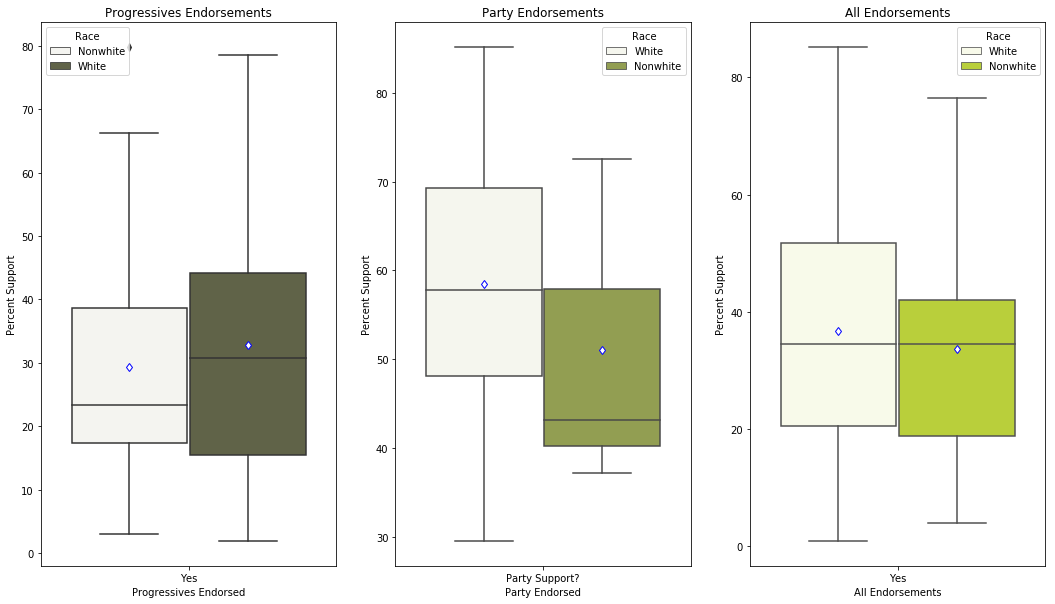

In [155]:
# Plot
plt.figure(figsize=(18,10))

# progressive_support
plt.subplot(131)
sb.boxplot(x='Progressive', y = 'Primary %', data = progressive_support, showmeans=True, color="#636843", hue='Race',
          meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"}).set(xlabel='Progressives Endorsed', ylabel='Percent Support')
plt.title('Progressives Endorsements')

# party_support
plt.subplot(132)
sb.boxplot(x='Endorsements', y = 'Primary %', data = party_support, showmeans=True, color="#9baa46", hue='Race',
          meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"}).set(
    xlabel='Party Endorsed', 
    ylabel='Percent Support'
)
plt.title('Party Endorsements')

# all_support
plt.subplot(133)
sb.boxplot(x='Endorsed', y = 'Primary %', data = all_support, showmeans=True, color="#cae822", hue='Race',
          meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"}).set(
    xlabel='All Endorsements', 
    ylabel='Percent Support'
)
plt.title('All Endorsements')

plt.show()

Back to [top](#Multi-Variate-Exploration)

We can see above that the Party Support pac not only had more white candidates, but also had a much higher average and performnce in general than non-Whites in the party.
Whites also lead the vote percent in the Progressive pacs.

### Challenges
One of the challanging things I had to deal with in this project was to assign the Progressive title to Progressive candidates, who also had non-Progressive endorsers. It could have been much easier if each candidate was either a Progressive or not. I solved it by creating a list of all the progressive candidates and then assigning the Yes value to each one of the candidates on the list into a new column, called "Progressive Candidate?".<br>
Another challenge was finding that I had missing data throughout the wrangling and the exploration phases. Each time that I found some data missing, I had to go and look for that data, clean it and merge it with the main dataframe I obtained from Five Thirty Eight.<br>
Exploring the data by uni-bi and multi variants was pretty confusing in the beginning since I decided go through various variables and had a lot of data to explore, which made the exploration file too long. I solved it by separating the wrangling part from the exploration part and separating the exploration file into 3 different files, following the uni-bi and multi variant parts. This ended up with more files, but much better readability and orientation.

### Future Explorations
I would add to this analysis, if I had the time, the amount of contributions each candidate received, to try and find if there is correlation between that and the success rate of pacs and individual candidates from the Progressive flank and the Establishment of the Democratic party.<br>
Another idea for future exploration is to compare this analysis with the Republican primaries and how they did with the different variables found on the Democratic dataset, like the distribution of Race. Or, the winnings of the Republican Progressive pacs. Haha, the last one will probably result as a joke! I wonder if there really are Progressives that run for office through the Republican party.<br>
Lastly, I would have liked to put my hands on the general elections of 2018's data and expend this project to learn how the Progressive movement did against the Republicans and how many seats they took in the Senate, Congress and the House of Representatives.

Back to [Exploration3](Exploration3.ipynb) | Back to [top](#Multi-Variate-Exploration)